In [176]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [177]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_no_hidden"
min_generation = 80
max_generation = 89

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [178]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000080, 1 / 10 ...
reading generation_0000081, 2 / 10 ...
reading generation_0000082, 3 / 10 ...
reading generation_0000083, 4 / 10 ...
reading generation_0000084, 5 / 10 ...
reading generation_0000085, 6 / 10 ...
reading generation_0000086, 7 / 10 ...
reading generation_0000087, 8 / 10 ...
reading generation_0000088, 9 / 10 ...
reading generation_0000089, 10 / 10 ...


In [179]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
5322,85,fish_241219_16_14_18.081575,28.7,False
3824,83,fish_241219_15_03_48.529413,29.2,False
1879,81,fish_241219_14_04_32.993843,29.6,False
4729,84,fish_241219_15_42_38.362591,33.3,False
8984,88,fish_241219_17_44_03.158284,34.8,False
...,...,...,...,...
6000,86,fish_241219_15_03_23.232972,5176.3,True
8381,88,fish_241219_17_43_36.703338,5318.0,False
6688,86,fish_241219_16_47_25.759754,5330.1,False
4205,84,fish_241219_15_42_19.536681,5366.1,False


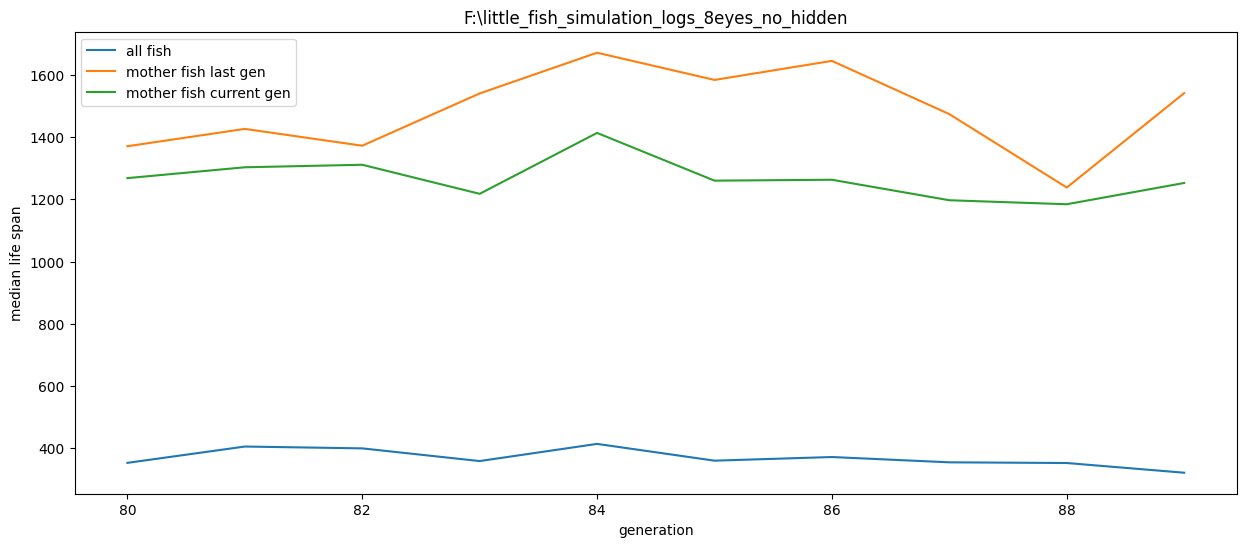

In [180]:
gens = sorted(life_span_df["generation"].unique())
median_life_span = []
median_mo_life_last_gen = []
median_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    median_life_span.append(np.median(curr_life_span))
    median_mo_life_last_gen.append(np.median(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    median_mo_life_curr_gen.append(np.median(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, median_life_span, label="all fish")
ax.plot(gens, median_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, median_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("median life span")
ax.set_title(simulation_folder)
ax.legend()

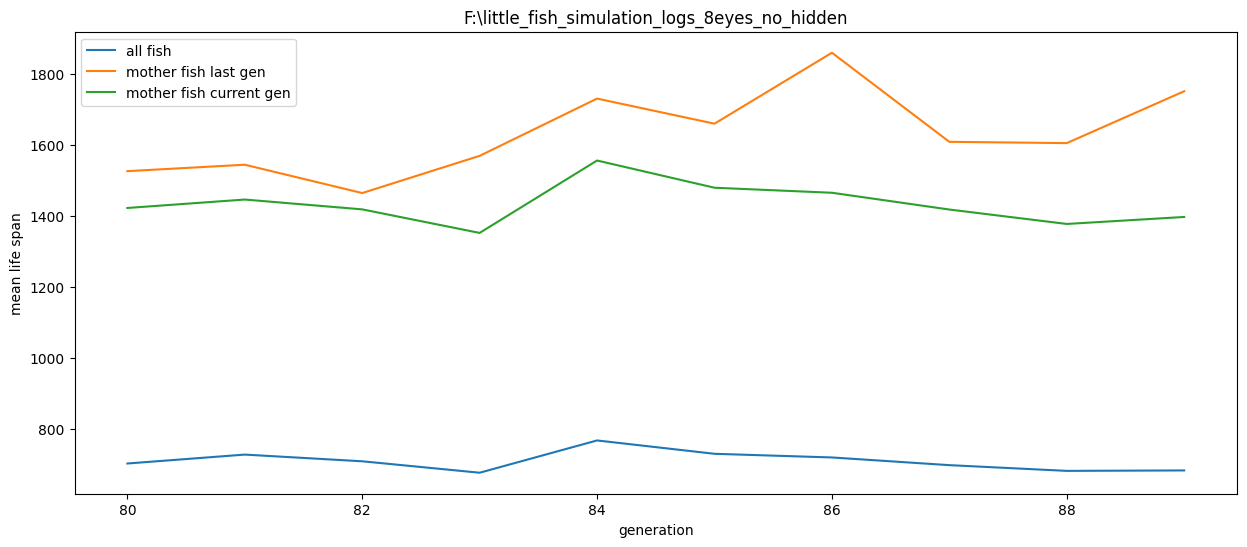

In [181]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 10000.0)

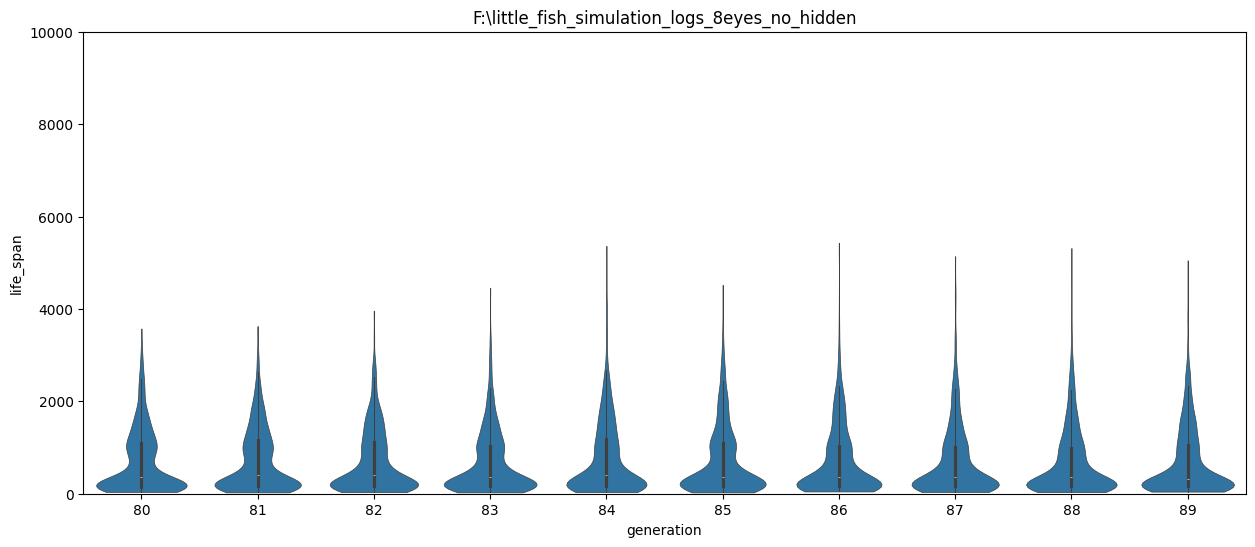

In [182]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 10000])

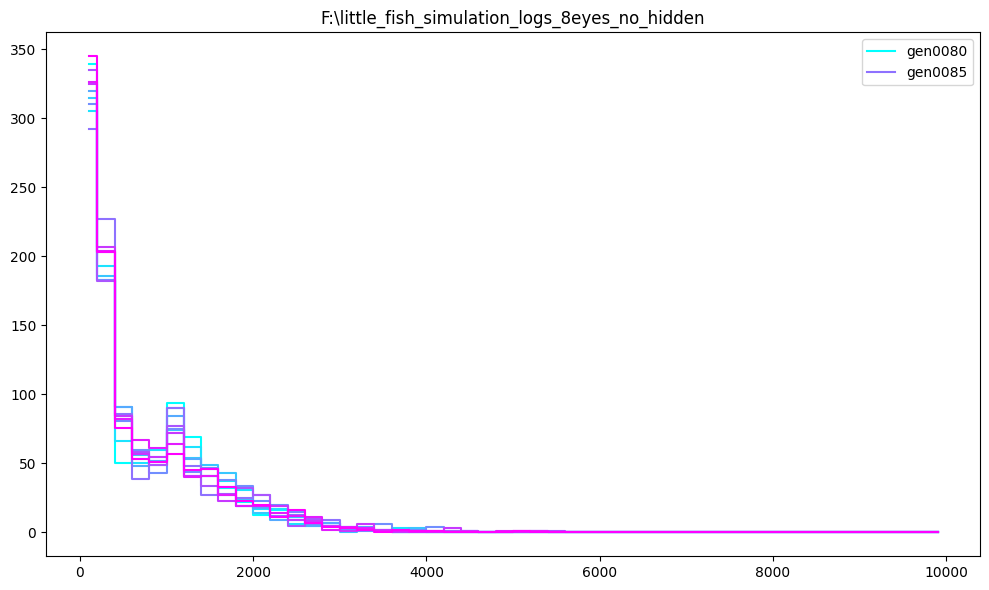

In [183]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()